In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed

import sys
import os
from pathlib import Path
import pickle
import numpy as np
import sklearn.model_selection as model_selection
from sklearn.decomposition import PCA
main_folder=str(Path.cwd().parent) 
sys.path.append(main_folder) 
data_folder = f'{main_folder}/data'


<ipython-input-1-a928b6582152>:11: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  aqua_globals.random_seed = seed


## Loading the processed data DR16_Processed

In [2]:
#Load the data
with open(f'{data_folder}/processed/DR16_processed_X.pkl','rb') as input_file:
    X = pickle.load(input_file)
with open(f'{data_folder}/processed/DR16_processed_y.pkl','rb') as input_file:
    y = pickle.load(input_file)



In [3]:
# Create binary target for 1st trial
y_star = y.apply(lambda x: "STAR" if x == "STAR" else "NOT_STAR")
class_labels_Star = list(set(y_star))
y_star_num =  y_star.apply(lambda x: 1 if x == "STAR" else 0)

In [4]:
#Create training_dataset and test_dataset with STAR and NOT_STAR
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_star_num, train_size=0.0004, test_size=0.9996, random_state=101)

X_test_40 = X_test.iloc[:40].copy()
y_test_40 = y_test.iloc[:40].copy()

X_test_extra = X_test.iloc[41:81].copy()
y_test_extra = y_test.iloc[41:81].copy()

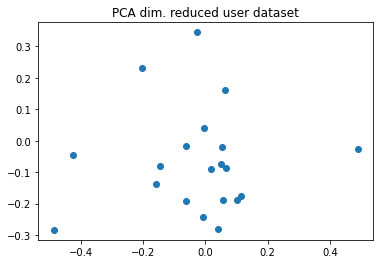

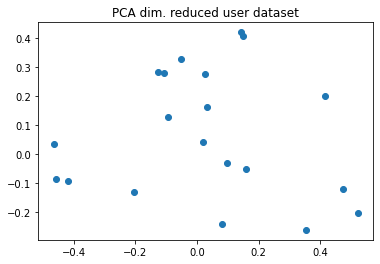

In [5]:
# Now reduce number of features to number of qubits
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test_40 = pca.transform(X_test_40)
X_test_extra = pca.transform(X_test_extra)

# If class labels are numeric
training_size = 40
test_size = 40
test_size_extra = 40

#this is where I transform our dataframe to Dict[key:np.array]
if class_labels_Star[0].isdigit():
        # Pick training size number of samples from each distro
    training_input = {key: (X_train[y_train == int(key), :])[:training_size] for k, key in enumerate(class_labels_Star)}
    test_input_extra = {key: (X_test_extra[y_test_extra == int(key), :])[:test_size_extra] for k, key in enumerate(class_labels_Star)}
    test_input = {key: (X_test_40[y_test == int(key), :])[: test_size] for k, key in enumerate(class_labels_Star)}
else:
    # if they aren't
    training_input = {key: (X_train[y_train == k, :])[:training_size] for k, key in enumerate(class_labels_Star)}
    test_input_extra = {key: (X_test_extra[y_test_extra == k, :])[:test_size_extra] for k, key in enumerate(class_labels_Star)}
    test_input = {key: (X_test_40[y_test_40 == k, :])[:test_size] for k, key in enumerate(class_labels_Star)}

# Plot the 2 dimension result of PCA
for k in range(0, 2):
    plt.scatter(X_train[y_train == k, 0][:training_size],
    X_train[y_train == k, 1][:training_size])
       
    plt.title("PCA dim. reduced user dataset")
    plt.show()   

 QSVM
 """
        Args:
            feature_map: Feature map module, used to transform data
            training_dataset: Training dataset.
            test_dataset: Testing dataset.
            datapoints: Prediction dataset.
            multiclass_extension: If number of classes is greater than 2 then a multiclass scheme
                must be supplied, in the form of a multiclass extension.
            lambda2: L2 norm regularization factor
            quantum_instance: Quantum Instance or Backend

In [8]:
# from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

#feature_dim = 2
# sample_total, training_input, test_input, class_labels = ad_hoc_data(
#     training_size=20, 
#     test_size=10, 
#     n=feature_dim, 
#     gap=0.3, 
#     plot_data=True
# )
# extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
# datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
# print(class_to_label)

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, test_input_extra)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

In [9]:
# from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

#feature_dim = 2
# sample_total, training_input, test_input, class_labels = ad_hoc_data(
#     training_size=20, 
#     test_size=10, 
#     n=feature_dim, 
#     gap=0.3, 
#     plot_data=True
# )
# extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
# datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
# print(class_to_label)

#feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')

#qsvm = QSVM(feature_map, training_input, test_input, test_input_extra)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

IndexError: tuple index out of range

In [16]:
# from qiskit import Aer
# from qiskit.aqua.input import SVMInput
# from qiskit.aqua import run_algorithm
# import numpy as np

# n = 2  # dimension of each data point
# #sample_Total, training_input, test_input, class_labels = Wine(training_size=40,test_size=10, n=n, PLOT_DATA=True)

# temp = [X_test_20[k] for k in X_test_20]
# total_array = np.concatenate(temp)

# aqua_dict = {'problem': {'name': 'svm_classification', 'random_seed': 10598},'algorithm': {'name': 'QSVM.Kernel'},'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entangler_map': {0: [1]}},'multiclass_extension': {'name': 'AllPairs'},'backend': {'shots': 1024}}

# backend = Aer.get_backend('qasm_simulator')
# algo_input = SVMInput(X_train, X_test_20, total_array)
# result = run_algorithm(aqua_dict, algo_input, backend=backend)
# for k,v in result.items():
#     print("'{}' : {}".format(k, v))

With the dataset ready we can setup the [QSVM](https://qiskit.org/documentation/stubs/qiskit.aqua.algorithms.QSVM.html) algorithm to do a classification. Here we use the [ZZFeatureMap](https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html) data encoding circuit from the Qiskit circuit library.

Here the BasicAer `qasm_simulator` is used with 1024 shots.

For the testing, the result includes the details and the success ratio. For the prediction, the result includes the predicted labels. 

The following shows the kernel matrix that was built from the training sample of the dataset.

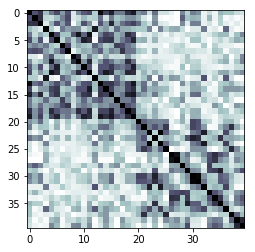

In [4]:
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r');

Qiskit also has a classical SVM implementation that takes the same input data for classification. Let's run this and do a comparison. Now the ad hoc data set was created to show that there can be datasets where quantum could give an advantage.

In [15]:
# from qiskit.aqua.algorithms import SklearnSVM

# result = SklearnSVM(training_input, test_input, [0]).run()

# print(f'Testing success ratio: {result["testing_accuracy"]}')
# print()
# print('Prediction from datapoints set:')
# print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
# print(f'  prediction:   {result["predicted_classes"]}')
# predicted_labels = result["predicted_labels"]
# print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

# kernel_matrix = result['kernel_matrix_training']
# plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r');